##### Copyright 2024 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Day 1 - Prompting

Welcome to the Kaggle 5-day Generative AI course!

This notebook will show you how to get started with the Gemini API and walk you through some of the example prompts and techniques that you can also read about in the Prompting whitepaper. You don't need to read the whitepaper to use this notebook, but the papers will give you some theoretical context and background to complement this interactive notebook.


## Before you begin

In this notebook, you'll start exploring prompts and prompt parameters using the Python SDK and AI Studio. For some inspiration, you might enjoy exploring some apps that have been built using the Gemini family of models. Here are a few that we like, and we think you will too.

* [TextFX](https://textfx.withgoogle.com/) is a suite of AI-powered tools for rappers, made in collaboration with Lupe Fiasco,
* [SQL Talk](https://sql-talk-r5gdynozbq-uc.a.run.app/) shows how you can talk directly to a database using the Gemini API,
* [NotebookLM](https://notebooklm.google/) uses Gemini models to build your own personal AI research assistant.


## For help

**Common issues are covered in the [FAQ and troubleshooting guide](https://www.kaggle.com/code/markishere/day-0-troubleshooting-and-faqs).**

### A note on the Gemini API and Vertex AI

In the whitepapers, most of the example code uses the Enterprise [Vertex AI platform](https://cloud.google.com/vertex-ai). In contrast, this notebook, along with the others in this series, will use the [Gemini Developer API](https://ai.google.dev/gemini-api/) and [AI Studio](https://aistudio.google.com/).

Both APIs provide access to the Gemini family of models, and the code to interact with the models is very similar. Vertex provides a world-class platform for enterprises, governments and advanced users that need powerful features like data governance, ML ops and deep Google Cloud integration.

AI Studio is free to use and only requires a compatible Google account to log in and get started. It is deeply integrated with the Gemini API, which comes with a generous [free tier](https://ai.google.dev/pricing) that you can use to run the code in these exercises.

If you are already set up with Google Cloud, you can check out the [Enterprise Gemini API](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/inference) through Vertex AI, and run the samples directly from the supplied whitepapers.

### Install the SDK

In [2]:
%pip install -U -q "google-generativeai>=0.8.3"

Note: you may need to restart the kernel to use updated packages.


You do not need to restart the kernel.

In [3]:
import google.generativeai as genai
from IPython.display import HTML, Markdown, display

### Set up your API key

To run the following cell, your API key must be stored it in a [Kaggle secret](https://www.kaggle.com/discussions/product-feedback/114053) named `GOOGLE_API_KEY`.

If you don't already have an API key, you can grab one from [AI Studio](https://aistudio.google.com/app/apikey). You can find [detailed instructions in the docs](https://ai.google.dev/gemini-api/docs/api-key).

To make the key available through Kaggle secrets, choose `Secrets` from the `Add-ons` menu and follow the instructions to add your key or enable it for this notebook.

In [4]:
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

If you received an error response along the lines of `No user secrets exist for kernel id ...`, then you need to add your API key via `Add-ons`, `Secrets` **and** enable it.

![Screenshot of the checkbox to enable GOOGLE_API_KEY secret](https://storage.googleapis.com/kaggle-media/Images/5gdai_sc_3.png)
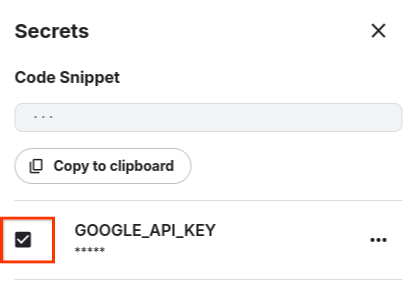

### Run your first prompt

In this step, you will test that your API key is set up correctly by making a request. The `gemini-1.5-flash` model has been selected here.

In [5]:
flash = genai.GenerativeModel('gemini-1.5-flash')
response = flash.generate_content("Explain AI to me like I'm a kid.")
print(response.text)

Imagine you have a really smart puppy.  You teach it tricks, like "sit" and "fetch."  At first, the puppy doesn't know what those words mean. But you show it, and give it treats when it does it right.  Slowly, the puppy learns!

Artificial Intelligence, or AI, is like teaching a computer to be smart, just like you teach your puppy.  Instead of treats, we give the computer lots and lots of information, like pictures of cats and dogs, or sentences in different languages.  The computer learns from this information, and gets better and better at things like:

* **Recognizing things:**  Like knowing a picture is a cat, not a dog.
* **Understanding language:**  Like understanding what you mean when you say "I want a story about a princess."
* **Playing games:**  Like beating you at chess or even video games!

It's not magic!  It's just clever programming that lets the computer learn and solve problems on its own, just like your clever puppy learns new tricks.  But remember, AI is still learn

The response often comes back in markdown format, which you can render directly in this notebook.

In [6]:
Markdown(response.text)

Imagine you have a really smart puppy.  You teach it tricks, like "sit" and "fetch."  At first, the puppy doesn't know what those words mean. But you show it, and give it treats when it does it right.  Slowly, the puppy learns!

Artificial Intelligence, or AI, is like teaching a computer to be smart, just like you teach your puppy.  Instead of treats, we give the computer lots and lots of information, like pictures of cats and dogs, or sentences in different languages.  The computer learns from this information, and gets better and better at things like:

* **Recognizing things:**  Like knowing a picture is a cat, not a dog.
* **Understanding language:**  Like understanding what you mean when you say "I want a story about a princess."
* **Playing games:**  Like beating you at chess or even video games!

It's not magic!  It's just clever programming that lets the computer learn and solve problems on its own, just like your clever puppy learns new tricks.  But remember, AI is still learning, just like your puppy – it's not perfect, yet!


### Start a chat

The previous example uses a single-turn, text-in/text-out structure, but you can also set up a multi-turn chat structure too.

In [7]:
chat = flash.start_chat(history=[])
response = chat.send_message('Hello! My name is Han.')
print(response.text)

Hello Han! It's nice to meet you.  How can I help you today?



In [8]:
response = chat.send_message('Can you tell something interesting about dinosaurs?')
print(response.text)

There's a lot of interesting things about dinosaurs!  To pick just one, how about this:  **Some dinosaurs had feathers!**

While we often picture dinosaurs as scaly reptiles, many, especially theropods (the group that includes *Tyrannosaurus rex*, but also smaller, bird-like dinosaurs), had feathers.  These feathers weren't necessarily like the feathers of birds today; some were fluffy, downy structures, while others were more complex.  This discovery has been crucial in understanding the evolutionary link between dinosaurs and modern birds.  Birds are, in fact, considered to be direct descendants of feathered dinosaurs.



In [9]:
response = chat.send_message('Can you tell me a brief story of Peter Rabbit?')
print(response.text)

Peter Rabbit, a cheeky young rabbit, disobeys his mother's warning and ventures into Mr. McGregor's garden.  He feasts on lettuce, radishes, and other vegetables, but is nearly caught by Mr. McGregor, who chases him through the garden.  Peter narrowly escapes, losing his jacket and shoes in the process, and rushes home, tired and frightened, only to find his mother waiting anxiously.  He receives a scolding but also a warm welcome back, and eventually, he eats some chamomile tea to calm down before going to bed.



In [10]:
# While you have the `chat` object around, the conversation state
# persists. Confirm that by asking if it knows my name.
response = chat.send_message('Do you remember what my name is?')
print(response.text)

Yes, you told me your name is Han.



### Choose a model

The Gemini API provides access to a number of models from the Gemini model family. Read about the available models and their capabilities on the [model overview page](https://ai.google.dev/gemini-api/docs/models/gemini).

In this step you'll use the API to list all of the available models.

In [11]:
for model in genai.list_models():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental
models/embedding-001
models/text-embedding-004
models

The [`models.list`](https://ai.google.dev/api/models#method:-models.list) response also returns additional information about the model's capabilities, like the token limits and supported parameters.

In [12]:
for model in genai.list_models():
  if model.name == 'models/gemini-1.5-flash':
    print(model)
    break

Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description=('Alias that points to the most recent stable version of Gemini 1.5 Flash, our '
                   'fast and versatile multimodal model for scaling across diverse tasks.'),
      input_token_limit=1000000,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=40)


## Explore generation parameters



### Output length

When generating text with an LLM, the output length affects cost and performance. Generating more tokens increases computation, leading to higher energy consumption, latency, and cost.

To stop the model from generating tokens past a limit, you can specify the `max_output_tokens` parameter when using the Gemini API. Specifying this parameter does not influence the generation of the output tokens, so the output will not become more stylistically or textually succinct, but it will stop generating tokens once the specified length is reached. Prompt engineering may be required to generate a more complete output for your given limit.

In [13]:
short_model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(max_output_tokens=200))

response = short_model.generate_content('Write a 1000 word essay on the importance of olives in modern society.')
print(response.text)

## The Enduring Significance of Olives in Modern Society

The olive, a seemingly unassuming fruit, holds a position of profound significance in modern society that extends far beyond its culinary applications.  Its history is intertwined with human civilization, its cultivation shaping landscapes, economies, and cultures across millennia.  From the Mediterranean basin, where it originated, to global markets, the olive and its derivatives – olive oil, olives for consumption, and olive pomace – continue to play vital roles in nutrition, economics, and cultural heritage. This essay will explore the multifaceted importance of olives in the contemporary world, examining its contributions to health, agriculture, industry, and cultural identity.

The most widely recognized contribution of olives to modern society is undoubtedly their nutritional value.  Olive oil, extracted from the fruit, is a cornerstone of the Mediterranean diet, renowned for its health benefits and associated with lower r

In [14]:
response = short_model.generate_content('Write a short poem on the importance of olives in modern society.')
print(response.text)

From ancient groves, a modern grace,
The olive thrives, in time and space.
Its oil, a gleam on countless plates,
A flavor prized, that elevates.

From salad dressing, light and bright,
To soaps that cleanse, and lamps that light,
The olive's gift, a versatile hand,
A staple strong, throughout the land. 



Explore with your own prompts. Try a prompt with a restrictive output limit and then adjust the prompt to work within that limit.

In [15]:
short_model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config = genai.GenerationConfig(max_output_tokens=500)
)
response = short_model.generate_content('Tell a story about the fox and the grapes.')
print(response.text)

The sun beat down on Finley the fox, baking the dusty hillside to a crisp. His stomach rumbled, a low, mournful growl that echoed the emptiness within.  He’d been hunting all morning, his usual cunning failing him.  Every rabbit darted just out of reach, every plump field mouse vanished into its burrow before he could pounce.

Then, he saw them.

High above, clinging to a vine that snaked across a sun-drenched wall, hung clusters of grapes.  Fat, purple, and glistening, they looked like jewels spilled from some celestial treasure chest.  Finley’s mouth watered.  These were the finest grapes he’d ever seen.

He leaped, his lithe body a blur of red fur.  He stretched, his paws scrabbling at the smooth stone, but the grapes remained tantalizingly out of reach.  He tried again, his muscles straining, his breath catching in his throat.  He jumped and leaped, a frantic, furry acrobat, but the grapes mocked him with their unattainable sweetness.

Finally, exhausted and frustrated, he slumped 

In [16]:
response = short_model.generate_content('Tell a short summary and lessons from the story the fox and the grapes.')
print(response.text)

A hungry fox spots a bunch of juicy grapes hanging high on a vine.  He tries repeatedly to reach them, but fails.  Finally, he declares the grapes must be sour anyway, and walks away.

**Lessons:**

* **Sour grapes:** This story gives us the idiom "sour grapes," which describes someone who belittles something they cannot attain.  It highlights the tendency to rationalize failure or disappointment rather than admit inability.
* **Facing reality:**  The fox's actions show the importance of accepting reality, even when it's unpleasant.  Instead of persevering or finding another way, he chose self-deception.
* **Honest self-assessment:**  The story encourages honest self-reflection and a willingness to admit limitations.  True success often comes from recognizing our weaknesses and adapting our strategies.



### Temperature

Temperature controls the degree of randomness in token selection. Higher temperatures result in a higher number of candidate tokens from which the next output token is selected, and can produce more diverse results, while lower temperatures have the opposite effect, such that a temperature of 0 results in greedy decoding, selecting the most probable token at each step.

Temperature doesn't provide any guarantees of randomness, but it can be used to "nudge" the output somewhat.

**Note that if you see a 429 Resource Exhausted error here, you may be able to edit the words in the prompt slightly to progress.**

In [17]:
from google.api_core import retry

high_temp_model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(temperature=2.0))


# When running lots of queries, it's a good practice to use a retry policy so your code
# automatically retries when hitting Resource Exhausted (quota limit) errors.
retry_policy = {
    "retry": retry.Retry(predicate=retry.if_transient_error, initial=10, multiplier=1.5, timeout=300)
}

for _ in range(5):
  response = high_temp_model.generate_content('Pick a random colour... (respond in a single word)',
                                              request_options=retry_policy)
  if response.parts:
    print(response.text, '-' * 25)

Maroon
 -------------------------
Aquamarine
 -------------------------
Maroon
 -------------------------
Aquamarine
 -------------------------
Marigold
 -------------------------


Now try the same prompt with temperature set to zero. Note that the output is not completely deterministic, as other parameters affect token selection, but the results will tend to be more stable.

In [18]:
low_temp_model = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(temperature=0.0))

for _ in range(5):
  response = low_temp_model.generate_content('Pick a random colour... (respond in a single word)',
                                             request_options=retry_policy)
  if response.parts:
    print(response.text, '-' * 25)

Maroon
 -------------------------
Maroon
 -------------------------
Maroon
 -------------------------
Maroon
 -------------------------
Maroon
 -------------------------


### Top-K and top-P

Like temperature, top-K and top-P parameters are also used to control the diversity of the model's output.

Top-K is a positive integer that defines the number of most probable tokens from which to select the output token. A top-K of 1 selects a single token, performing greedy decoding.

Top-P defines the probability threshold that, once cumulatively exceeded, tokens stop being selected as candidates. A top-P of 0 is typically equivalent to greedy decoding, and a top-P of 1 typically selects every token in the model's vocabulary.

When both are supplied, the Gemini API will filter top-K tokens first, then top-P and then finally sample from the candidate tokens using the supplied temperature.

Run this example a number of times, change the settings and observe the change in output.

In [19]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        # These are the default values for gemini-1.5-flash-001.
        temperature=1.0,
        top_k=64,
        top_p=0.95,
    ))

story_prompt = "You are a creative writer. Write a short story about a cat who goes on an adventure."
response = model.generate_content(story_prompt, request_options=retry_policy)
print(response.text)

Bartholomew wasn't your average tabby. He wasn't content with napping in sunbeams and chasing dust bunnies. Bartholomew craved adventure. The world outside his window, a chaotic symphony of buzzing, chirping, and rustling, beckoned him. So, one moonless night, while the humans slept, Bartholomew slipped out the cat flap, his whiskers twitching with anticipation.

The world was a jungle of fragrant scents and shadowy shapes. He stalked through the garden, his sleek form weaving between rosebushes and tomato plants. A rustle in the bushes sent him leaping onto a rickety fence, his amber eyes catching a flash of movement. A plump, black rabbit hopped away, leaving Bartholomew panting with a sense of exhilaration.

He continued his journey, his paws leading him to a bustling street. Cars zoomed past, their headlights momentarily blinding him. He squeezed under a parked car, his ears pricked, listening to the city's symphony. He found himself in a bustling alleyway, a labyrinth of overflowi

In [20]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        # These are the default values for gemini-1.5-flash-001.
        temperature=1.0,
        top_k=80,
        top_p=0.90,
    ))

story_prompt = "You are a creative writer. Write a short story about a cat who goes on an adventure."
response = model.generate_content(story_prompt, request_options=retry_policy)
print(response.text)

Bartholomew, a ginger tabby with a perpetually grumpy expression, had always considered his life perfectly adequate. Sunbeams, a steady supply of tuna, and the occasional head scratch from his human, Amelia, were all he desired. However, one fateful Tuesday, a stray feather, imbued with the magic of the wind, drifted through his window and landed on his nose. Suddenly, Bartholomew felt a yearning, a need for something...more. 

He watched Amelia leave for work, a yearning growing in his chest. He knew what he had to do. He was going on an adventure.

He slipped out the window, his whiskers twitching with excitement. The world outside was a symphony of smells - blooming lilacs, damp earth, and the enticing aroma of fish from the nearby market. He followed his nose, a fearless explorer in a world of towering legs and rumbling engines.

His adventure led him to the park, a verdant paradise teeming with feathered friends. He stalked a squirrel, a majestic hunter in the dappled sunlight, be

## Prompting

This section contains some prompts from the chapter for you to try out directly in the API. Try changing the text here to see how each prompt performs with different instructions, more examples, or any other changes you can think of.

### Zero-shot

Zero-shot prompts are prompts that describe the request for the model directly.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1gzKKgDHwkAvexG5Up0LMtl1-6jKMKe4g"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [21]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=5,
    ))

zero_shot_prompt = """Classify movie reviews as POSITIVE, NEUTRAL or NEGATIVE.
Review: "Her" is a disturbing study revealing the direction
humanity is headed if AI is allowed to keep evolving,
unchecked. I wish there were more movies like this masterpiece.
Sentiment: """

response = model.generate_content(zero_shot_prompt, request_options=retry_policy)
print(response.text)

Sentiment: **POSITIVE**


In [22]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=5,
    ))

zero_shot_prompt = """Classify movie reviews as POSITIVE, NEUTRAL or NEGATIVE.
Review: An insightful, if often crude and narrow, defense of how trade and greater specialization will continue to fuel humanity's progress toward higher living standards and greater human dignity for all. 
Sentiment: """

response = model.generate_content(zero_shot_prompt, request_options=retry_policy)
print(response.text)

Sentiment: **POSITIVE**


In [23]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=5,
    ))

zero_shot_prompt = """Classify movie reviews as POSITIVE, NEUTRAL or NEGATIVE.
Review: I wanted to like this, but it was filled with total nonsense so I couldn't. Some of it is mildly interesting. None of it is new. And most of the verifiable stuff is distorted into his markets-can-do-no-wrong libertarianism. I even like books that are libertarian. This one was irritating though because it was so blatantly manipulating data and facts. If you want to be an optimist, go read more rational ones like: Abundance, or Pinker, or Sapiens, etc. This is empty nonsense. 
Sentiment: """

response = model.generate_content(zero_shot_prompt, request_options=retry_policy)
print(response.text)

Sentiment: **NEGATIVE**


In [24]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=5,
    ))
zero_shot_prompt = """Classify food reviews as POSITIVE, NEUTRAL or NEGATIVE
Review: Came with a friend to check out then place because I heard it was popular among friends at the University. 
To my surprise, the restaurant was empty on a weekend evening, despite the lack of people, we decided to try out their thai food. 
After studying all day we ordered the Cashew Nut Chicken with jasmine rice and chicken pad thai. 
The Servers were very nice and respectful, our food came quick and hot. After diving in our food for the first tastes, we were very pleased. The food was amazing. It was first time trying the chicken cashew, and I will definetly be back to get it again. The portion sizes are massive as well and you definitely get your money’s worth of food. The ambience of the resturant is very nice and it is very clean and well kept. Thank you for your hospitality!
Sentiment: """
response = model.generate_content(zero_shot_prompt, request_options=retry_policy)
print(response.text)

Sentiment: **POSITIVE**


In [25]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
    ))
zero_shot_prompt = """Classify food reviews as POSITIVE, NEUTRAL or NEGATIVE
Review: The food is good but the staffs just keep interrupting by checking if we are done with the food, which destroys the experience of enjoying food or vibe
Sentiment: """
response = model.generate_content(zero_shot_prompt, request_options=retry_policy)
print(response.text)

Sentiment: **NEGATIVE** 

The reviewer explicitly states the food is good, but the staff's behavior negatively impacted their experience. The phrase "destroys the experience" clearly indicates a negative sentiment. 



#### Enum mode

The models are trained to generate text, and can sometimes produce more text than you may wish for. In the preceding example, the model will output the label, sometimes it can include a preceding "Sentiment" label, and without an output token limit, it may also add explanatory text afterwards.

The Gemini API has an [Enum mode](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Enum.ipynb) feature that allows you to constrain the output to a fixed set of values.

In [26]:
import enum

class Sentiment(enum.Enum):
    POSITIVE = "positive"
    NEUTRAL = "neutral"
    NEGATIVE = "negative"


model = genai.GenerativeModel(
    'gemini-1.5-flash-001',
    generation_config=genai.GenerationConfig(
        response_mime_type="text/x.enum",
        response_schema=Sentiment
    ))

response = model.generate_content(zero_shot_prompt, request_options=retry_policy)
print(response.text)

negative


### One-shot and few-shot

Providing an example of the expected response is known as a "one-shot" prompt. When you provide multiple examples, it is a "few-shot" prompt.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1jjWkjUSoMXmLvMJ7IzADr_GxHPJVV2bg"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>


In [27]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        top_p=1,
        max_output_tokens=250,
    ))

few_shot_prompt = """Parse a customer's pizza order into valid JSON:

EXAMPLE:
I want a small pizza with cheese, tomato sauce, and pepperoni.
JSON Response:
```
{
"size": "small",
"type": "normal",
"ingredients": ["cheese", "tomato sauce", "peperoni"]
}
```

EXAMPLE:
Can I get a large pizza with tomato sauce, basil and mozzarella
JSON Response:
```
{
"size": "large",
"type": "normal",
"ingredients": ["tomato sauce", "basil", "mozzarella"]
}

ORDER:
"""

customer_order = "Give me a large with cheese & pineapple"


response = model.generate_content([few_shot_prompt, customer_order], request_options=retry_policy)
print(response.text)

```json
{
  "size": "large",
  "type": "normal",
  "ingredients": ["cheese", "pineapple"]
}
```



#### JSON mode

To provide control over the schema, and to ensure that you only receive JSON (with no other text or markdown), you can use the Gemini API's [JSON mode](https://github.com/google-gemini/cookbook/blob/main/quickstarts/JSON_mode.ipynb). This forces the model to constrain decoding, such that token selection is guided by the supplied schema.

In [28]:
import typing_extensions as typing

class PizzaOrder(typing.TypedDict):
    size: str
    ingredients: list[str]
    type: str


model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        response_mime_type="application/json",
        response_schema=PizzaOrder,
    ))

response = model.generate_content("Can I have a large dessert pizza with apple and chocolate")
print(response.text)

{"ingredients": ["apple", "chocolate"], "size": "large", "type": "dessert pizza"}


### Chain of Thought (CoT)

Direct prompting on LLMs can return answers quickly and (in terms of output token usage) efficiently, but they can be prone to hallucination. The answer may "look" correct (in terms of language and syntax) but is incorrect in terms of factuality and reasoning.

Chain-of-Thought prompting is a technique where you instruct the model to output intermediate reasoning steps, and it typically gets better results, especially when combined with few-shot examples. It is worth noting that this technique doesn't completely eliminate hallucinations, and that it tends to cost more to run, due to the increased token count.

As models like the Gemini family are trained to be "chatty" and provide reasoning steps, you can ask the model to be more direct in the prompt.

In [29]:
prompt = """When I was 4 years old, my partner was 3 times my age. Now, I
am 20 years old. How old is my partner? Return the answer directly."""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt, request_options=retry_policy)

print(response.text)

41



Now try the same approach, but indicate to the model that it should "think step by step".

In [30]:
prompt = """When I was 4 years old, my partner was 3 times my age. Now,
I am 20 years old. How old is my partner? Let's think step by step."""

response = model.generate_content(prompt, request_options=retry_policy)
print(response.text)

Here's how to solve this step-by-step:

1. **Partner's age when you were 4:** When you were 4, your partner was 3 times your age, meaning they were 4 * 3 = 12 years old.

2. **Age difference:** The age difference between you and your partner is 12 - 4 = 8 years.

3. **Partner's current age:** Since you are now 20, and the age difference remains constant, your partner is currently 20 + 8 = 28 years old.

Therefore, your partner is now 28 years old.



In [31]:
prompt = """Bob has 5 tennis balls. He bought 3 cans of tennis ball, which has 5 balls each.
How many tennis balls does Bob have?"""
response = model.generate_content(prompt, request_options=retry_policy)
print(response.text)

Bob started with 5 tennis balls.  He bought 3 cans * 5 balls/can = 15 more balls.

In total, Bob has 5 + 15 = $\boxed{20}$ tennis balls.



### ReAct: Reason and act

In this example you will run a ReAct prompt directly in the Gemini API and perform the searching steps yourself. As this prompt follows a well-defined structure, there are frameworks available that wrap the prompt into easier-to-use APIs that make tool calls automatically, such as the LangChain example from the chapter.

To try this out with the Wikipedia search engine, check out the [Searching Wikipedia with ReAct](https://github.com/google-gemini/cookbook/blob/main/examples/Search_Wikipedia_using_ReAct.ipynb) cookbook example.


> Note: The prompt and in-context examples used here are from [https://github.com/ysymyth/ReAct](https://github.com/ysymyth/ReAct) which is published under a [MIT license](https://opensource.org/licenses/MIT), Copyright (c) 2023 Shunyu Yao.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/18oo63Lwosd-bQ6Ay51uGogB3Wk3H8XMO"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>


In [32]:
model_instructions = """
Solve a question answering task with interleaving Thought, Action, Observation steps. Thought can reason about the current situation,
Observation is understanding relevant information from an Action's output and Action can be one of three types:
 (1) <search>entity</search>, which searches the exact entity on Wikipedia and returns the first paragraph if it exists. If not, it
     will return some similar entities to search and you can try to search the information from those topics.
 (2) <lookup>keyword</lookup>, which returns the next sentence containing keyword in the current context. This only does exact matches,
     so keep your searches short.
 (3) <finish>answer</finish>, which returns the answer and finishes the task.
"""

example1 = """Question
Musician and satirist Allie Goertz wrote a song about the "The Simpsons" character Milhouse, who Matt Groening named after who?

Thought 1
The question simplifies to "The Simpsons" character Milhouse is named after who. I only need to search Milhouse and find who it is named after.

Action 1
<search>Milhouse</search>

Observation 1
Milhouse Mussolini Van Houten is a recurring character in the Fox animated television series The Simpsons voiced by Pamela Hayden and created by Matt Groening.

Thought 2
The paragraph does not tell who Milhouse is named after, maybe I can look up "named after".

Action 2
<lookup>named after</lookup>

Observation 2
Milhouse was named after U.S. president Richard Nixon, whose middle name was Milhous.

Thought 3
Milhouse was named after U.S. president Richard Nixon, so the answer is Richard Nixon.

Action 3
<finish>Richard Nixon</finish>
"""

example2 = """Question
What is the elevation range for the area that the eastern sector of the Colorado orogeny extends into?

Thought 1
I need to search Colorado orogeny, find the area that the eastern sector of the Colorado orogeny extends into, then find the elevation range of the area.

Action 1
<search>Colorado orogeny</search>

Observation 1
The Colorado orogeny was an episode of mountain building (an orogeny) in Colorado and surrounding areas.

Thought 2
It does not mention the eastern sector. So I need to look up eastern sector.

Action 2
<lookup>eastern sector</lookup>

Observation 2
The eastern sector extends into the High Plains and is called the Central Plains orogeny.

Thought 3
The eastern sector of Colorado orogeny extends into the High Plains. So I need to search High Plains and find its elevation range.

Action 3
<search>High Plains</search>

Observation 3
High Plains refers to one of two distinct land regions

Thought 4
I need to instead search High Plains (United States).

Action 4
<search>High Plains (United States)</search>

Observation 4
The High Plains are a subregion of the Great Plains. From east to west, the High Plains rise in elevation from around 1,800 to 7,000 ft (550 to 2,130m).

Thought 5
High Plains rise in elevation from around 1,800 to 7,000 ft, so the answer is 1,800 to 7,000 ft.

Action 5
<finish>1,800 to 7,000 ft</finish>
"""

# Come up with more examples yourself, or take a look through https://github.com/ysymyth/ReAct/

To capture a single step at a time, while ignoring any hallucinated Observation steps, you will use `stop_sequences` to end the generation process. The steps are `Thought`, `Action`, `Observation`, in that order.

In [33]:
question = """Question
Who was the youngest author listed on the transformers NLP paper?
"""

model = genai.GenerativeModel('gemini-1.5-flash-latest')
react_chat = model.start_chat()

# You will perform the Action, so generate up to, but not including, the Observation.
config = genai.GenerationConfig(stop_sequences=["\nObservation"])

resp = react_chat.send_message(
    [model_instructions, example1, example2, question],
    generation_config=config,
    request_options=retry_policy)
print(resp.text)

Thought 1
I need to find the Transformers NLP paper and then find the authors' ages to determine the youngest.  This will require searching for the paper and then likely some outside research to find the authors' ages.

Action 1
<search>Transformers NLP paper</search>



Now you can perform this research yourself and supply it back to the model.

In [34]:
observation = """Observation 1
[1706.03762] Attention Is All You Need
Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.
"""
resp = react_chat.send_message(observation, generation_config=config, request_options=retry_policy)
print(resp.text)

Thought 2
The observation gives me the authors of the paper "Attention is All You Need". I now need to find their ages at the time of publication (2017). This will require additional searching or lookups, likely outside the scope of the provided actions.  I can't directly get their ages from this text.

Action 2
<finish>I need additional information to answer this question.  The provided search only returns the authors' names, not their ages.</finish>



This process repeats until the `<finish>` action is reached. You can continue running this yourself if you like, or try the [Wikipedia example](https://github.com/google-gemini/cookbook/blob/main/examples/Search_Wikipedia_using_ReAct.ipynb) to see a fully automated ReAct system at work.

## Code prompting

### Generating code

The Gemini family of models can be used to generate code, configuration and scripts. Generating code can be helpful when learning to code, learning a new language or for rapidly generating a first draft.

It's important to be aware that since LLMs can't reason, and can repeat training data, it's essential to read and test your code first, and comply with any relevant licenses.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1YX71JGtzDjXQkgdes8bP6i3oH5lCRKxv"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [35]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=1,
        top_p=1,
        max_output_tokens=1024,
    ))

# Gemini 1.5 models are very chatty, so it helps to specify they stick to the code.
code_prompt = """
Write a Python function to calculate the factorial of a number. No explanation, provide only the code.
"""

response = model.generate_content(code_prompt, request_options=retry_policy)
Markdown(response.text)

```python
def factorial(n):
  if n == 0:
    return 1
  else:
    return n * factorial(n-1)
```


### Code execution

The Gemini API can automatically run generated code too, and will return the output.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/11veFr_VYEwBWcLkhNLr-maCG0G8sS_7Z"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [36]:
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    tools='code_execution',)

code_exec_prompt = """
Calculate the sum of the first 14 prime numbers. Only consider the odd primes, and make sure you count them all.
"""

response = model.generate_content(code_exec_prompt, request_options=retry_policy)
Markdown(response.text)

To calculate the sum of the first 14 odd prime numbers, I will first identify the first 14 odd prime numbers and then compute their sum.  Note that 2 is the only even prime number.


``` python
import sympy

def is_prime(n):
  """Checks if a number is prime."""
  if n <= 1:
    return False
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True

count = 0
num = 3
primes = []
while count < 14:
    if is_prime(num):
        primes.append(num)
        count += 1
    num += 2

print(f'{primes=}')
sum_of_primes = sum(primes)
print(f'{sum_of_primes=}')

```
```
primes=[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
sum_of_primes=326

```
The first 14 odd prime numbers are 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, and 47.  Their sum is 326.


While this looks like a single-part response, you can inspect the response to see the each of the steps: initial text, code generation, execution results, and final text summary.

In [37]:
for part in response.candidates[0].content.parts:
  print(part)
  print("-----")

text: "To calculate the sum of the first 14 odd prime numbers, I will first identify the first 14 odd prime numbers and then compute their sum.  Note that 2 is the only even prime number.\n\n"

-----
executable_code {
  language: PYTHON
  code: "\nimport sympy\n\ndef is_prime(n):\n  \"\"\"Checks if a number is prime.\"\"\"\n  if n <= 1:\n    return False\n  for i in range(2, int(n**0.5) + 1):\n    if n % i == 0:\n      return False\n  return True\n\ncount = 0\nnum = 3\nprimes = []\nwhile count < 14:\n    if is_prime(num):\n        primes.append(num)\n        count += 1\n    num += 2\n\nprint(f\'{primes=}\')\nsum_of_primes = sum(primes)\nprint(f\'{sum_of_primes=}\')\n"
}

-----
code_execution_result {
  outcome: OUTCOME_OK
  output: "primes=[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]\nsum_of_primes=326\n"
}

-----
text: "The first 14 odd prime numbers are 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, and 47.  Their sum is 326.\n"

-----


### Explaining code

The Gemini family of models can explain code to you too.

<table align=left>
  <td>
    <a target="_blank" href="https://aistudio.google.com/prompts/1N7LGzWzCYieyOf_7bAG4plrmkpDNmUyb"><img src="https://ai.google.dev/site-assets/images/marketing/home/icon-ais.png" style="height: 24px" height=24/> Open in AI Studio</a>
  </td>
</table>

In [38]:
file_contents = !curl https://raw.githubusercontent.com/magicmonty/bash-git-prompt/refs/heads/master/gitprompt.sh

explain_prompt = f"""
Please explain what this file does at a very high level. What is it, and why would I use it?

```
{file_contents}
```
"""

model = genai.GenerativeModel('gemini-1.5-flash-latest')

response = model.generate_content(explain_prompt, request_options=retry_policy)
Markdown(response.text)

This file is a Bash script that enhances the command prompt in Git repositories.  It provides a customizable prompt that displays information about the current Git branch, status (e.g., changes, untracked files), and potentially remote tracking information.

You would use this script to improve your Git workflow by making it easier to see the status of your repository at a glance, directly in your terminal prompt.  Instead of constantly typing `git status`, the relevant information is always present.  The script supports themes for color customization, and allows for configuration through a `.bash-git-rc` file in the repository.  It also handles different shell types (Bash and Zsh).


## Learn more

To learn more about prompting in depth:

* Check out the whitepaper issued with today's content,
* Try out the apps listed at the top of this notebook ([TextFX](https://textfx.withgoogle.com/), [SQL Talk](https://sql-talk-r5gdynozbq-uc.a.run.app/) and [NotebookLM](https://notebooklm.google/)),
* Read the [Introduction to Prompting](https://ai.google.dev/gemini-api/docs/prompting-intro) from the Gemini API docs,
* Explore the Gemini API's [prompt gallery](https://ai.google.dev/gemini-api/prompts) and try them out in AI Studio,
* Check out the Gemini API cookbook for [inspirational examples](https://github.com/google-gemini/cookbook/blob/main/examples/) and [educational quickstarts](https://github.com/google-gemini/cookbook/blob/main/quickstarts/).

And please share anything exciting you have tried in the Discord!